# Machine learning: SVM and Naïve Bayes algorithm

### Purpose: compare two algorithms: SVM and Naive Bayes algorithm in predicting drug types. 

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load Dataset
data=pd.read_csv('./drugdataset.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,drugY
1,47,0,1,1,13.093,drugC
2,47,0,1,1,10.114,drugC
3,28,1,0,1,7.798,drugX
4,61,1,1,1,18.043,drugY


In [4]:
#Explore dataset
data.describe()

,Age,Sex,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.480000,1.090000,0.515000,16.084485
std,16.544315,0.500854,0.821752,0.501029,7.223956
min,15.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,0.000000,1.000000,1.000000,13.936500
75%,58.000000,1.000000,2.000000,1.000000,19.380000
max,74.000000,1.000000,2.000000,1.000000,38.247000


In [5]:
#Explore the types of datasets
data.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug            object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


In [20]:
#to see whether there are any missing values
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

<AxesSubplot:>

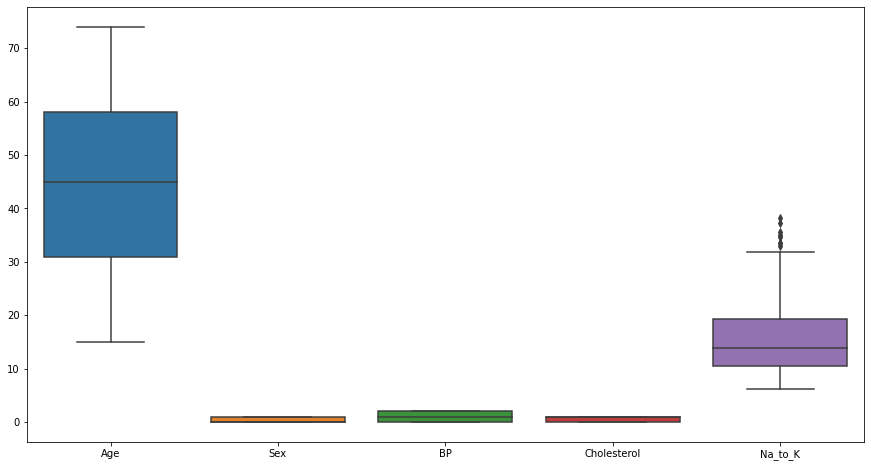

In [21]:
#Boxplot Visualization
plt.figure(figsize=(15,8))
sns.boxplot(data=data)

(array([91.,  0., 16.,  0.,  0., 54.,  0., 23.,  0., 16.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

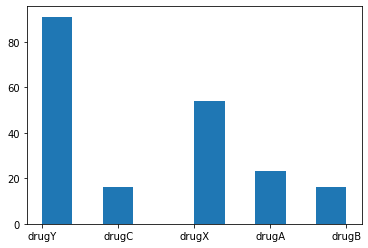

In [32]:
plt.hist(data.Drug)

In [4]:
#Create x and y variables
x=data.drop('Drug', axis=1).to_numpy()
y=data['Drug'].to_numpy()

#Create Training and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, stratify=y,test_size=0.2,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [7]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['drugA','drugB','drugC','drugX','drugY']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))          


Estimator: SVM
[[ 5  0  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  3  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  1 17]]
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       0.92      1.00      0.96        11
       drugY       0.94      0.94      0.94        18

    accuracy                           0.95        40
   macro avg       0.97      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40


Estimator: Naive Bayes
[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 10  1]
 [ 1  1  3  1 12]]
              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       0.75      1.00      0.86         3
       drugC       0.50      1.00      0.67         3
       drugX       0.91      0.91      0.91        11
       drugY      